In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn import neighbors
from sklearn import preprocessing
from scipy import stats
from sklearn import tree
warnings.filterwarnings('ignore')
%matplotlib inline

ata: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.isnull().sum().max()

1453

In [104]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_missingData = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(df_missingData.head(20))
df.isnull().sum().max()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


1453

In [7]:
df_dropped = df.drop(df_missingData[(df_missingData.Percent > .15)].index, axis=1)

In [8]:
df_dropped.isnull().sum().max()

81

In [9]:
#drop null rows
df_dropped = df_dropped.dropna()
df_dropped.isnull().sum().max()

0

In [10]:
df_dropped.shape

(1338, 75)

In [11]:
df_train = pd.get_dummies(df_dropped)

In [12]:
#df['SalePrice'].str.isnumeric()

In [13]:
allFeats = [a for a in df_train.columns if a not in ['SalePrice']]

In [14]:
cols = df_dropped.columns
num_cols = df_dropped._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [15]:
cat_cols

['Exterior2nd',
 'GarageQual',
 'BsmtFinType1',
 'HeatingQC',
 'Condition1',
 'GarageCond',
 'LotShape',
 'ExterQual',
 'Condition2',
 'GarageFinish',
 'SaleCondition',
 'Foundation',
 'Street',
 'MasVnrType',
 'Neighborhood',
 'RoofMatl',
 'PavedDrive',
 'LandSlope',
 'BldgType',
 'GarageType',
 'BsmtExposure',
 'SaleType',
 'Heating',
 'BsmtQual',
 'MSZoning',
 'HouseStyle',
 'KitchenQual',
 'CentralAir',
 'BsmtFinType2',
 'Utilities',
 'Exterior1st',
 'ExterCond',
 'Functional',
 'BsmtCond',
 'RoofStyle',
 'Electrical',
 'LandContour',
 'LotConfig']

In [16]:
df_dropped['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [17]:
for col in cat_cols:
    uniqueValues = df_dropped[col].unique()
    print('\n'+col)
    for v in uniqueValues:
        print('- ' + str(v))


Exterior2nd
- VinylSd
- MetalSd
- Wd Shng
- HdBoard
- Plywood
- Wd Sdng
- CmentBd
- BrkFace
- Stucco
- AsbShng
- Brk Cmn
- ImStucc
- AsphShn
- Other
- Stone
- CBlock

GarageQual
- TA
- Fa
- Gd
- Ex
- Po

BsmtFinType1
- GLQ
- ALQ
- Unf
- Rec
- BLQ
- LwQ

HeatingQC
- Ex
- Gd
- TA
- Fa
- Po

Condition1
- Norm
- Feedr
- PosN
- Artery
- RRAe
- RRNn
- RRAn
- PosA
- RRNe

GarageCond
- TA
- Fa
- Gd
- Po
- Ex

LotShape
- Reg
- IR1
- IR2
- IR3

ExterQual
- Gd
- TA
- Ex
- Fa

Condition2
- Norm
- Artery
- RRNn
- Feedr
- PosN
- PosA
- RRAn
- RRAe

GarageFinish
- RFn
- Unf
- Fin

SaleCondition
- Normal
- Abnorml
- Partial
- Family
- Alloca
- AdjLand

Foundation
- PConc
- CBlock
- BrkTil
- Wood
- Stone

Street
- Pave
- Grvl

MasVnrType
- BrkFace
- None
- Stone
- BrkCmn

Neighborhood
- CollgCr
- Veenker
- Crawfor
- NoRidge
- Mitchel
- Somerst
- NWAmes
- OldTown
- BrkSide
- Sawyer
- NridgHt
- NAmes
- SawyerW
- IDOTRR
- MeadowV
- Timber
- Gilbert
- StoneBr
- ClearCr
- Edwards
- NPkVill
- Blmngtn
- BrDa

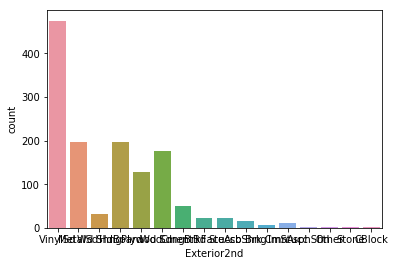

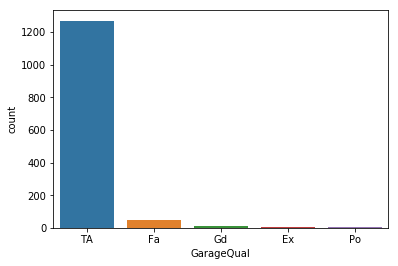

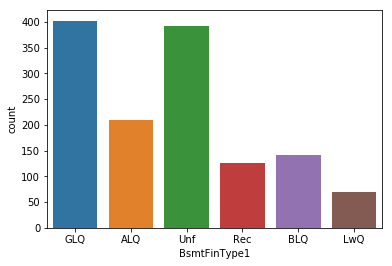

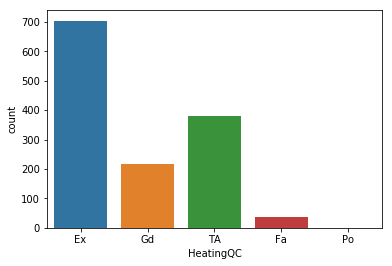

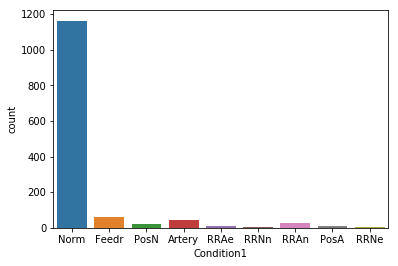

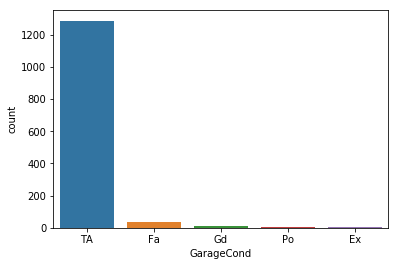

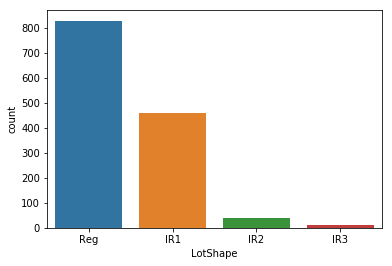

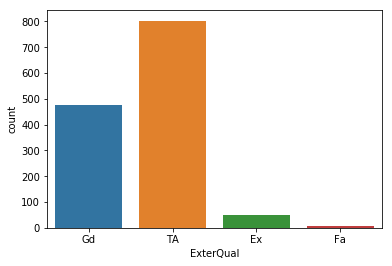

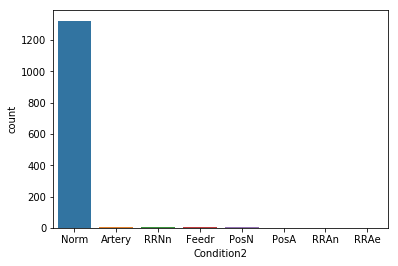

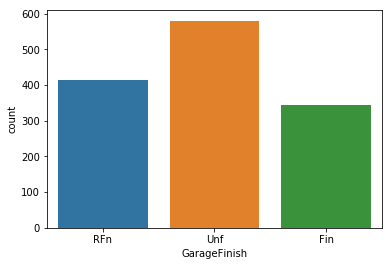

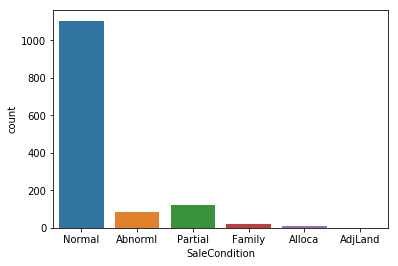

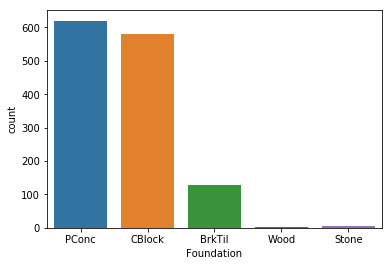

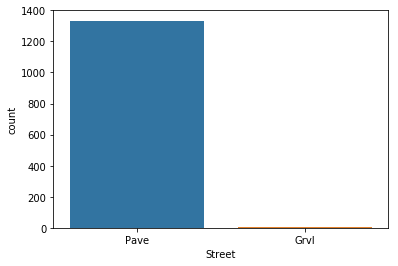

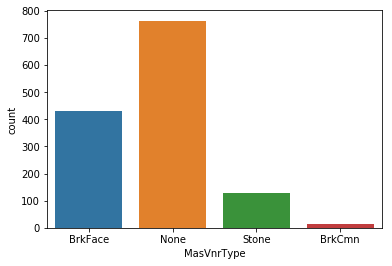

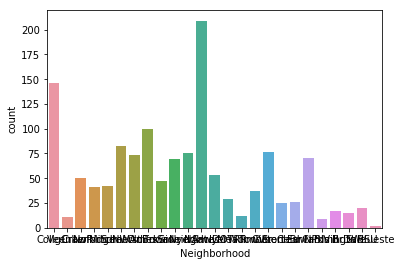

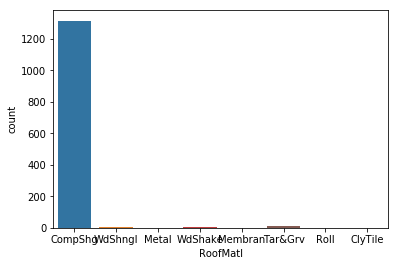

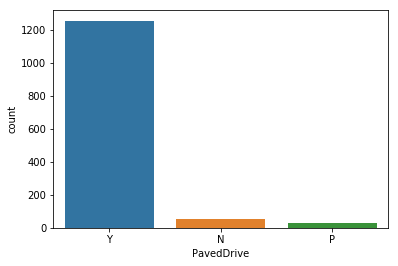

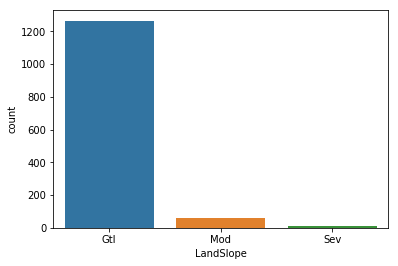

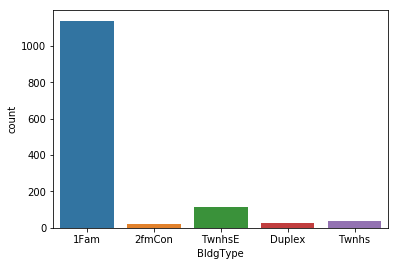

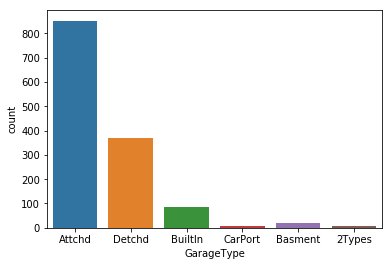

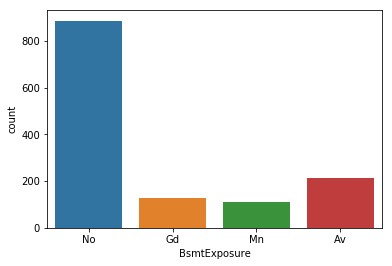

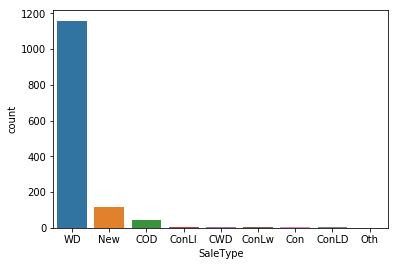

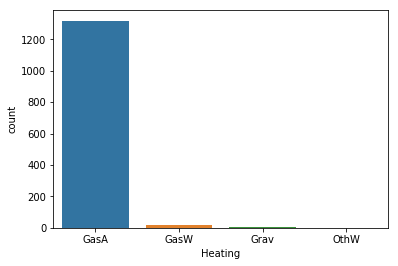

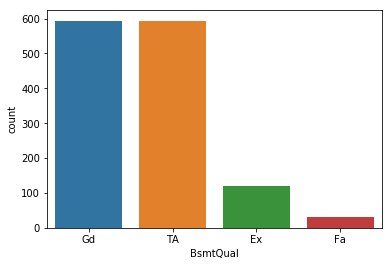

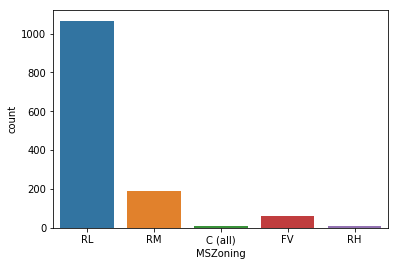

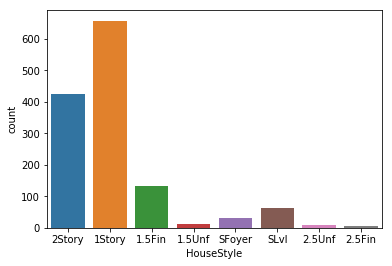

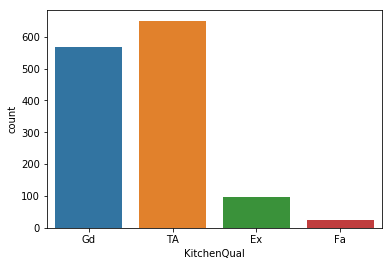

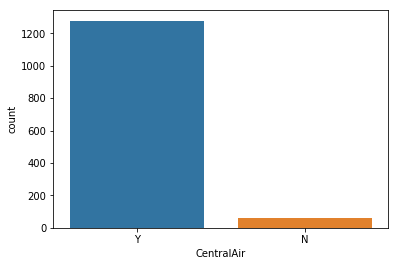

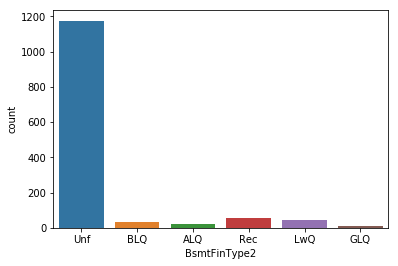

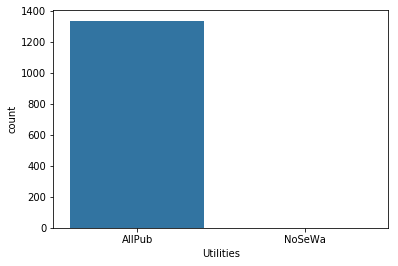

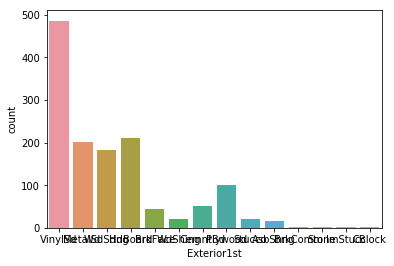

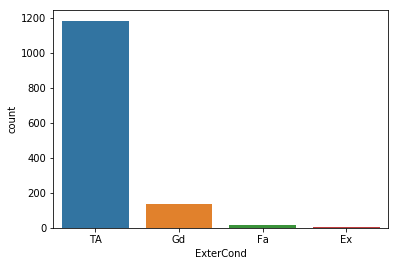

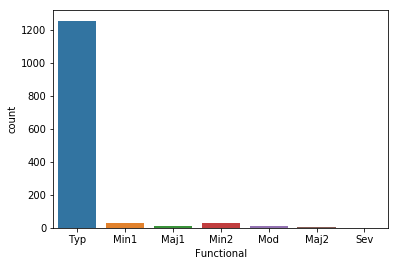

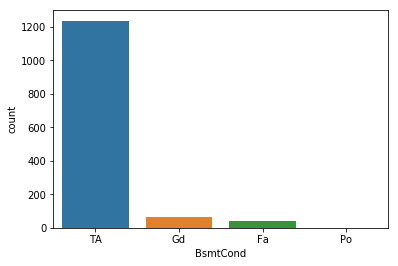

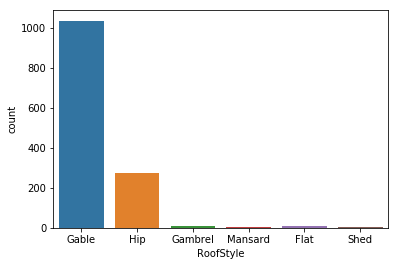

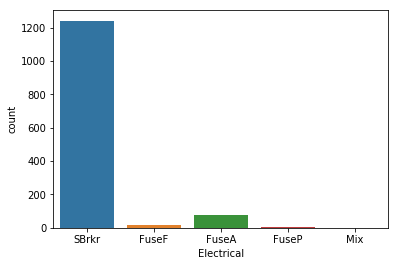

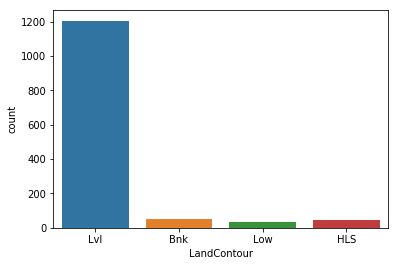

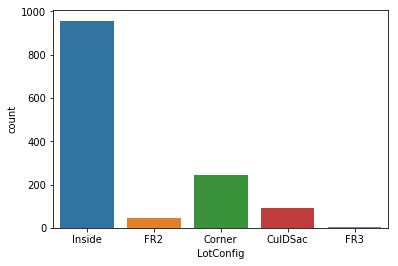

In [18]:
for col in cat_cols:
    sns.countplot(x=col, data=df_dropped)
    plt.show()

In [19]:
df_allDummies = pd.get_dummies(df_dropped[cat_cols])


In [20]:
#df.select_dtypes(exclude=["number","bool_","object_"])
# no nulls
# all numeric
#df.select_dtypes(exclude=['object'])

In [21]:
df_allDummies.isnull().sum().max()

0

In [22]:
df_full = pd.concat([df_dropped[num_cols], df_allDummies], axis=1)

In [23]:
allFeats = [a for a in df_full.columns if a not in ['SalePrice']]

In [46]:
#X=df_full[allFeats]
X=df_full[num_cols]
Y=df_full['SalePrice']


In [47]:
X.isnull().sum().max()

0

In [49]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=10,
    max_depth=20
)
dt = decision_tree.fit(X, Y)

In [50]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(dt, X, Y, cv=10)
np.var(results)

0.0033589060087252341

In [105]:
'''1. Treat values as categorical by default.
2. Check for various attributes of the data that would 
imply it is actually continuous. Weight these attributes 
based on how likely they are to correlate with continuous data. 
Here are some possible examples:
    * Values are integers: +.7
    * Values are floats: +.8
    * Values are normally distributed: +.3
    * Values contain a relatively small number of unique values: +.3
    * Values aren't all the same number of characters: +.1
    * Values don't contain leading zeros: +.1
3. Treat any columns that sum to greater than 1 as being 
numerical. Adjust the factors and weights based on testing against
different data sets to suit your needs. You could even build and train 
a separate machine learning algorithm just to do this.'''
for col in df_dropped:
    score = 0
    if type(df_dropped[col]) is int:
        score = score + .7
    if type(df_dropped[col]) is float:
        score = score + .8
    # check for normality
    k,p=stats.mstats.normaltest(df_dropped[col])
    if p >= 0.05:
        #column is normal
        score = score + .3

np.unique(df_dropped['GarageYrBlt'], return_counts=True)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [51]:
results

array([ 0.01594896,  0.05      ,  0.03947368,  0.0776699 ,  0.05633803,
        0.01886792,  0.17142857,  0.        ,  0.17647059,  0.07142857])

In [52]:
np.mean(results)

0.067762623423028495

In [63]:
import time
from sklearn import ensemble

start_time = time.time()
rfc = ensemble.RandomForestClassifier()
results = cross_val_score(rfc, X, Y, cv=10)
print("%s secs" % (time.time() - start_time))


3.986354112625122 secs


In [58]:
np.mean(results)

0.16129822713303452

In [59]:
np.var(results)

0.017839525687113254

In [87]:
maxFeatRange = range(10,20)
maxDepthRange = range(10,20)
df_Results = pd.DataFrame(columns=['maxFeat','maxDepth'])

for maxFeat in maxFeatRange:
    for maxDepth in maxDepthRange:
        #start_time = time.time()
        rfc=ensemble.RandomForestClassifier()
        
        print (maxDepth)
        decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=maxFeat,
        max_depth=maxDepth
        )
        dt = decision_tree.fit(X, Y)
        
        crossVal = cross_val_score(dt, X, Y, cv=10)
        r = np.mean(crossVal)
        ovrFit = np.var(crossVal)
        df_Results = df_Results.append({'maxFeat': maxFeat, 
                                        'maxDepth': maxDepth,
                                        'r': r,
                                        'OverFit': ovrFit
                                       }, ignore_index=True)
        

        

10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19
10
11
12
13
14
15
16
17
18
19


In [88]:
df_Results.sort_values('OverFit')

,maxFeat,maxDepth,OverFit,r
18,11.0,18.0,0.000547,0.033182
13,11.0,13.0,0.000583,0.046022
28,12.0,18.0,0.000685,0.077455
43,14.0,13.0,0.000881,0.072433
4,10.0,14.0,0.000985,0.044099
26,12.0,16.0,0.001005,0.053351
12,11.0,12.0,0.001069,0.054676
23,12.0,13.0,0.001078,0.044787
37,13.0,17.0,0.001237,0.070499
16,11.0,16.0,0.001337,0.053784


In [99]:
from sklearn.decomposition import PCA

Xpca = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=10)

y_sklearn = sklearn_pca.fit_transform(X)


In [100]:
start_time = time.time()
rfc = ensemble.RandomForestClassifier()
results = cross_val_score(rfc, y_sklearn, Y, cv=10)
print("%s secs" % (time.time() - start_time))

5.6333208084106445 secs


In [101]:
np.mean(results)

0.32808585541618285

In [102]:
np.var(results)

0.030152584113489745